### Importing necessary libraries

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt


### We are importing the existing CIFR-10 dataset from tensorflow keras

In [47]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


### Reshaping, declaring labels

In [48]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [49]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

### Using optimizer SGD 

In [50]:
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history1 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)


Epoch 1/5
469/469 [==============================] - 9s 19ms/step - loss: 0.4359 - accuracy: 0.8637 - val_loss: 0.1120 - val_accuracy: 0.9682
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0976 - accuracy: 0.9698 - val_loss: 0.0683 - val_accuracy: 0.9783
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.0619 - val_accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0587 - val_accuracy: 0.9806
Epoch 5/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0600 - val_accuracy: 0.9822


### Using optimizer ADAM

In [52]:
optimizer = Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    kernel_regularizer=l2(0.01),
)
history2 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)

TypeError: Invalid keyword argument(s) in `compile()`: ({'kernel_regularizer'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

### Using optimizer RMSPROP

In [ ]:
optimizer = RMSprop(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history3 = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    validation_data=(test_images, test_labels),
)

Epoch 1/5
469/469 [==============================] - 9s 19ms/step - loss: 0.2373 - accuracy: 0.9851 - val_loss: 0.3822 - val_accuracy: 0.9840
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3875 - accuracy: 0.9842 - val_loss: 0.3537 - val_accuracy: 0.9886
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.5677 - accuracy: 0.9838 - val_loss: 0.8519 - val_accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.8253 - accuracy: 0.9833 - val_loss: 0.9433 - val_accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 1.1527 - accuracy: 0.9839 - val_loss: 1.5079 - val_accuracy: 0.9803


### Assing accuracy and loss

In [ ]:
sgd_training_acc = history1.history["accuracy"]
sgd_val_acc = history1.history["val_accuracy"]
sgd_loss = history1.history["loss"]

adam_training_acc = history2.history["accuracy"]
adam_val_acc = history2.history["val_accuracy"]
adam_loss = history2.history["loss"]

rmsprop_training_acc = history3.history["accuracy"]
rmsprop_val_acc = history3.history["val_accuracy"]
rmsprop_loss = history3.history["loss"]

### Plotting training and validation accurary for corresponding optimizers in subplot

Text(0.5, 0, 'RMSProp Validation Accuracy')

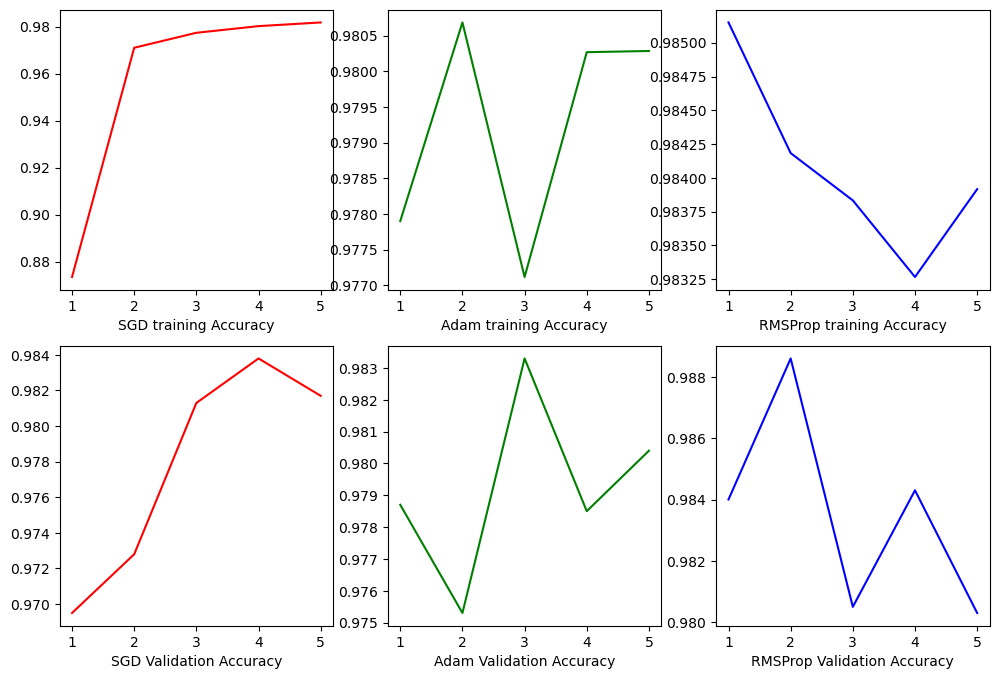

In [ ]:
list = [1, 2, 3, 4, 5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].plot(list, sgd_training_acc, label="SGD training Accuracy", color="r")
axes[0, 0].set_xlabel("SGD training Accuracy")
axes[1, 0].plot(list, sgd_val_acc, label="SGD Validation Accuracy", color="r")
axes[1, 0].set_xlabel("SGD Validation Accuracy")


axes[0, 1].plot(list, adam_training_acc, label="Adam training Accuracy", color="g")
axes[0, 1].set_xlabel("Adam training Accuracy")
axes[1, 1].plot(list, adam_val_acc, label="SGD Validation Accuracy", color="g")
axes[1, 1].set_xlabel("Adam Validation Accuracy")


axes[0, 2].plot(
    list, rmsprop_training_acc, label="RMSProp training Accuracy", color="b"
)
axes[0, 2].set_xlabel("RMSProp training Accuracy")
axes[1, 2].plot(list, rmsprop_val_acc, label="RMSProp Validation Accuracy", color="b")
axes[1, 2].set_xlabel("RMSProp Validation Accuracy")

### Measaring loss for different optimizers we used

Text(0.5, 1.0, 'RmsProp LOSS')

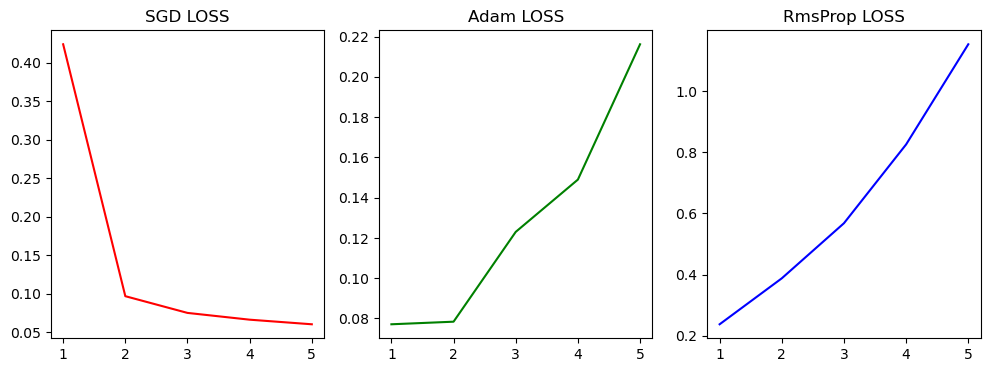

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(list, sgd_loss, color="r")
ax1.set_title("SGD LOSS")

ax2.plot(list, adam_loss, color="g")
ax2.set_title("Adam LOSS")

ax3.plot(list, rmsprop_loss, color="b")
ax3.set_title("RmsProp LOSS")

# My Report

The initial plot presents a comparison of model accuracy with and without data preprocessing, using Adam, RMSProp, and SGD optimizers on the CIFAR-10 dataset. The subsequent plot visualizes the loss of these optimizers. Results indicate that data preprocessing does not consistently improve accuracy; in some cases, it can lead to reduced accuracy, such as with Adam (0.986 without preprocessing, 0.983 with preprocessing). The minimum loss is seen for adam among all the optimizers.